In [ ]:
!pip install openai

In [5]:
import pandas as pd
import openai, numpy as np
import os

In [8]:
api_key = os.environ.get('GPT4_API_KEY')
openai.api_key = api_key

In [3]:
df = pd.read_csv('sample_bert.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'sample_bert.csv'

In [30]:
import openai
import tiktoken

from openai import OpenAI
api_key = os.environ.get('GPT4_API_KEY_RAHUL')
client = OpenAI(api_key)

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=model).data[0].embedding

df['ada_embedding'] = df['summary'].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))

In [31]:
df.head()

,summary,cluster_tag,clusters,ada_embedding
0,firefox quantum slowly closes file uri process...,Functional Performance Bugs,2,"[-0.0863833948969841, 0.030919058248400688, 0...."
1,dragged images from firefox doesn't fully supp...,Functional Performance Bugs,2,"[-0.02354534901678562, 0.0003636110923253, 0.0..."
2,preferences show firefox is the default browse...,Functional Performance Bugs,2,"[-0.025987323373556137, -0.017255669459700584,..."
3,when choosing a different application to open ...,Functional Performance Bugs,2,"[-0.03110983781516552, 0.020747585222125053, 0..."
4,"when downloading the proxy.pac file, firefox d...",Functional Performance Bugs,2,"[-0.002262335969135165, -0.04367123916745186, ..."


C:\Users\yousu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


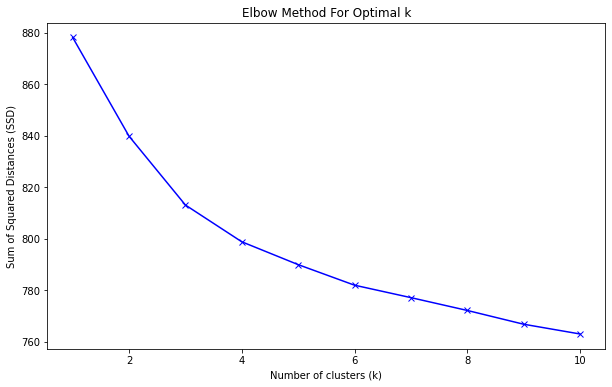

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming `df['ada_embedding']` is a list of lists where each sub-list is an embedding
# Convert list of embeddings to a suitable format (e.g., a list of lists if not already)
embeddings = df['ada_embedding'].tolist()

# Determine the range of k values to test
k_values = range(1, 11)  # Adjust the upper limit as needed

# Calculate SSD for each k
ssd = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    ssd.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [46]:
import numpy as np
from sklearn.cluster import KMeans

matrix = np.vstack(df.ada_embedding.values)
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
df['Cluster'] = kmeans.labels_

In [57]:
df.tail(50)


,summary,cluster_tag,ada_embedding,Cluster,PCA1,PCA2
1210,some engines disabled during syncing with inte...,Workflow Bugs,"[0.013512318953871727, 0.048919353634119034, 0...",0,0.058843,0.229569
1211,firefox doesn't load wordpress webm listings ...,Workflow Bugs,"[-0.054203473031520844, 0.003060184186324477, ...",1,0.225959,-0.224610
1212,macos - firefox browser on mac shows up on the...,Workflow Bugs,"[-0.02935909666121006, -0.037115540355443954, ...",1,0.105588,-0.219316
1213,cannot easily reattempt navigating to a url th...,Workflow Bugs,"[0.009900682605803013, -0.005742396228015423, ...",0,-0.056202,0.038005
1214,firefox dualshock 4 support,Workflow Bugs,"[0.003769450820982456, -0.042207762598991394, ...",1,0.024884,-0.034868
1215,clicking right mouse button on folder's dropma...,Workflow Bugs,"[-0.03139355033636093, 0.013707838952541351, 0...",0,-0.057828,0.058299
1216,problem installing extensions,Workflow Bugs,"[-0.017711536958813667, -0.006221573334187269,...",0,0.115288,0.094155
1217,sessionstore.settabstate should serialize prin...,Workflow Bugs,"[0.01701076701283455, 0.01185353472828865, 0.0...",0,-0.230467,0.168230
1218,tag pages visited from a search with the searc...,Workflow Bugs,"[0.01995149813592434, 0.00406209472566843, -0....",2,-0.259514,0.157868
1219,firefox xslt transform removes the closing tag...,Workflow Bugs,"[-0.02026159130036831, 0.010346103459596634, 0...",1,0.131159,-0.096387


In [59]:
df_sorted = df.sort_values(by='Cluster')
df_sorted

,summary,cluster_tag,ada_embedding,Cluster,PCA1,PCA2
3,when choosing a different application to open ...,Functional Performance Bugs,"[-0.03110983781516552, 0.020747585222125053, 0...",0,0.035541,0.184238
364,intermittent browser_save_video.js | video fil...,Functional Performance Bugs,"[-0.03777916729450226, 0.012868674471974373, 0...",0,0.105856,0.201531
1040,reload pages from a script,Workflow Bugs,"[0.016842851415276527, 0.03307482227683067, 0....",0,-0.104183,0.143508
1041,disconnected device keeps syncing and never re...,Workflow Bugs,"[-0.0017409624997526407, 0.0002041513362200930...",0,-0.057719,0.185895
358,remove preprocessing from browser/components/s...,Functional Performance Bugs,"[-0.027304913848638535, 0.020685136318206787, ...",0,0.003954,0.143487
...,...,...,...,...,...,...
561,tabs (and page) smooth scrolling animation dur...,User Interface,"[0.005190843716263771, 0.025599926710128784, 0...",2,-0.287635,-0.038107
851,headless screenshot is too quick: the page has...,Workflow Bugs,"[0.02119862101972103, 0.013491950929164886, 0....",2,-0.096516,0.034124
560,minimizing browser should set active state of ...,User Interface,"[-0.04212012141942978, 0.020053155720233917, -...",2,-0.286037,-0.189496
568,unpinning a tab doesn't scroll it into view & ...,User Interface,"[-0.03856245428323746, 0.003671875689178705, 0...",2,-0.338047,-0.138239


In [60]:
count = df['Cluster'].value_counts()
print(count)

1    435
0    433
2    389
Name: Cluster, dtype: int64


In [62]:
df_sorted.head(50)

,summary,cluster_tag,ada_embedding,Cluster,PCA1,PCA2
3,when choosing a different application to open ...,Functional Performance Bugs,"[-0.03110983781516552, 0.020747585222125053, 0...",0,0.035541,0.184238
364,intermittent browser_save_video.js | video fil...,Functional Performance Bugs,"[-0.03777916729450226, 0.012868674471974373, 0...",0,0.105856,0.201531
1040,reload pages from a script,Workflow Bugs,"[0.016842851415276527, 0.03307482227683067, 0....",0,-0.104183,0.143508
1041,disconnected device keeps syncing and never re...,Workflow Bugs,"[-0.0017409624997526407, 0.0002041513362200930...",0,-0.057719,0.185895
358,remove preprocessing from browser/components/s...,Functional Performance Bugs,"[-0.027304913848638535, 0.020685136318206787, ...",0,0.003954,0.143487
355,mozilla print blank pdf files,Functional Performance Bugs,"[-0.023368431255221367, 0.018236974254250526, ...",0,0.151413,0.174443
353,top and bottom images are not displayed in pdf...,Functional Performance Bugs,"[0.007392799481749535, 0.007485413923859596, 0...",0,0.006275,0.165204
351,changes to backend input files result in confi...,Functional Performance Bugs,"[0.03690219298005104, 0.004981176927685738, 0....",0,0.040419,0.341294
1050,session restore does not restore,Workflow Bugs,"[0.010788056999444962, 0.011198202148079872, 0...",0,-0.027243,0.133055
1052,evaluate whether we still need -moz-crisp-edge...,Workflow Bugs,"[-0.014800445176661015, 0.01797596551477909, 0...",0,0.042503,0.033433


In [61]:
df.to_csv("gpt_1.csv", index = False)

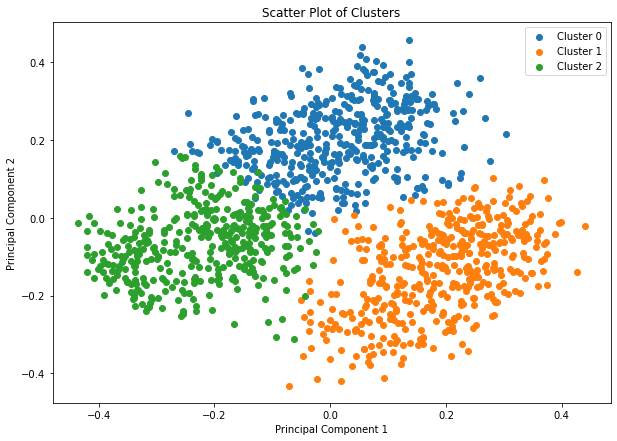

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'matrix' contains your high-dimensional data
# and 'df['Cluster']' contains the cluster labels

# Reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(matrix)

# Append the reduced data to your dataframe
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Plotting
plt.figure(figsize=(10, 7))
plt.title('Scatter Plot of Clusters')

# Plot each cluster
for i in range(n_clusters):
    # Filter data points belonging to the current cluster
    cluster_data = df[df['Cluster'] == i]
    
    # Plot the data points
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [83]:



import numpy as np
import openai

# Assuming `df` is your DataFrame containing error descriptions and their embeddings

categories = {
    "Networking & Security": "Issues related to network connectivity, protocols, and vulnerabilities that could lead to unauthorized access or data breaches.",
    "Performance & Resource Management": "Problems causing slowdowns, resource-heavy operation, or inefficiencies in system resource allocation.",
    "UI/UX & Accessibility": "Bugs in the user interface or experience that affect usability, hinder navigation, or prevent the browser from being usable by individuals with disabilities.",
    "Compatibility & Web Standards": "Issues arising when the browser does not function as expected across different platforms or with various web standards, including rendering errors.",
    "Privacy & User Data": "Problems affecting user control over personal information, data sharing preferences, and how the browser handles data storage.",
    "Media, Extensions, & Plugins": "Issues with audio/video playback, and malfunctions related to browser extensions or plugins.",
    "Installation, Updates, & User Preferences": "Challenges related to installing the browser, updating it, patching software, and errors affecting the saving/restoration of user settings.",
    "Developer Tools & Debugging": "Malfunctions within built-in developer tools that impede website testing, debugging, or development, including JavaScript engine bugs.",
    "File Handling & System Interaction": "Issues involving browser interaction with file downloads, uploads, and local file system access.",
    "Session Management & Synchronization": "Faults in how the browser manages session information and problems with synchronizing settings or data across devices."
}

from openai import OpenAI
api_key = os.environ.get('GPT4_API_KEY_RAHUL')
client = OpenAI(api_key)

def get_embedding(text, model="text-embedding-3-small"):
    #text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=model).data[0].embedding

# Assuming you have a response object from the OpenAI API
def extract_embedding_from_response(response):
    # Normally, you would access the embedding like this:
    # embedding = response['data'][0]['embedding']
    # However, based on the error, it seems the response object is not a dictionary as expected.
    
    # Correctly accessing the embedding (assuming 'response' is the actual response object you get)
    embedding = response.data[0].embedding  # Adjust this line based on the actual structure
    return embedding

# Update the function to generate category embeddings to correctly handle the response
def generate_category_embeddings(categories):
    category_embeddings = {}
    for cat, desc in categories.items():
        response = client.embeddings.create(input=desc, model="text-embedding-ada-002")
        embedding = extract_embedding_from_response(response)  # Use the corrected function
        category_embeddings[cat] = embedding
    return category_embeddings

# The rest of the logic remains the same...

category_embeddings = generate_category_embeddings(categories)

# Function to calculate cosine similarity
def cosine_similarity(vec_a, vec_b):
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return dot_product / (norm_a * norm_b)

# Function to find the most similar category for a given text embedding
def find_most_similar_category(text_embedding, category_embeddings):
    max_similarity = -1
    most_similar_category = None
    for category, embedding in category_embeddings.items():
        similarity = cosine_similarity(text_embedding, embedding)
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_category = category
    return most_similar_category

# Apply the function to each row in the DataFrame and store the results in a new column
df['Predicted_Category'] = df['ada_embedding'].apply(lambda x: find_most_similar_category(x, category_embeddings))

print(df[['summary', 'Predicted_Category']])


                                                                                                       summary  \
3               when choosing a different application to open a file the chosen application is ignored           
4     when downloading the proxy.pac file, firefox does not send the cookie: http header to the server           
5                                                        [pdf.js] pdf file making firefox unresponsive           
6                                 shows blank pdf when file is hosted in a directory protected by ntlm           
7                            firefox 32 or higher refuses to restore session files from older versions           
...                                                                                                        ...   
1255                                                                       web pages capture control-l           
1256                                 spellchecker: language and word menu items accumula

In [84]:
df.head(50)

,summary,cluster_tag,ada_embedding,Cluster,PCA1,PCA2,Predicted_Category
3,when choosing a different application to open a file the chosen application is ignored,Functional Performance Bugs,"[-0.03110983781516552, 0.020747585222125053, 0.07454360276460648, -0.04735711216926575, 0.015127967111766338, -0.06951248645782471, 0.01189697440713644, 0.007223575375974178, -0.026586448773741722, 0.02930971421301365, -0.03387926146388054, -0.008960234001278877, 0.007292810827493668, 0.08155947178602219, 0.007996705360710621, 0.021532254293560982, 0.022709259763360023, -0.05192665755748749, -0.0255940742790699, -0.028432730585336685, -0.004808985628187656, 0.062496621161699295, -0.020147543400526047, 0.005204205401241779, -0.012566251680254936, -0.041979819536209106, -0.002354008611291647, 0.015254898928105831, 0.026171036064624786, 0.0032367617823183537, 0.016893472522497177, -0.026147957891225815, -0.0021362050902098417, 0.0024304562248289585, -0.05197281762957573, -0.016224196180701256, 0.0036492901854217052, 0.009208327159285545, 0.018970539793372154, 0.013247068040072918, -0.012104681693017483, -0.010610347613692284, 0.00931795034557581, 0.03798723593354225, 0.03207913786172867, 0.025801779702305794, 0.00836019217967987, 0.0007817847072146833, 0.019801365211606026, -0.008683291263878345, -0.02446322701871395, -0.02820194512605667, -0.00551288016140461, -0.015693390741944313, 0.03290996327996254, -0.021601490676403046, 0.026840312406420708, -0.05049579218029976, -0.020655270665884018, -0.023193906992673874, -0.012462398037314415, 3.563196514733136e-05, -0.00849866308271885, 0.04851103946566582, 0.002604987472295761, 0.02804039604961872, -0.01978982612490654, 0.015508762560784817, -0.0051032365299761295, -0.010518033057451248, -0.0524805448949337, -0.0018390691839158535, -0.0134432353079319, 0.046203188598155975, -0.0055532678961753845, 0.013581706210970879, -0.021578412503004074, -0.01871667616069317, 0.04290296137332916, -0.014366376213729382, -0.007390894461423159, 0.02070142887532711, -0.026355665177106857, -0.0038800754118710756, -0.022166913375258446, 0.02674799971282482, -0.033833105117082596, -0.01515104528516531, 0.03293304145336151, -0.04673399403691292, -0.040318164974451065, 0.03911808505654335, 0.006594685837626457, 0.003845457686111331, -0.004661859944462776, 0.06480447202920914, 0.004454153589904308, -0.03978735953569412, 0.00450319517403841, 0.046041637659072876, ...]",0,0.035541,0.184238,Compatibility & Web Standards
4,"when downloading the proxy.pac file, firefox does not send the cookie: http header to the server",Functional Performance Bugs,"[-0.002262335969135165, -0.04367123916745186, 0.05037118121981621, 0.01858515292406082, 0.04599300026893616, 0.004585479851812124, 0.024190548807382584, 0.00047264440217986703, 0.016584014520049095, 0.0031122667714953423, 0.03272578865289688, -0.02046467363834381, 0.01592065393924713, 0.03493699058890343, 0.008358343504369259, -0.006733109708875418, -0.00540086068212986, -0.020431505516171455, 0.004784488119184971, 0.014472316950559616, 0.035290781408548355, 0.04807152971625328, -0.0127254668623209, -0.008308591321110725, -0.04953092336654663, 0.0005382894887588918, -0.0024931300431489944, 0.00378668331541121, 0.007628646679222584, 0.009580031968653202, -0.03880659490823746, -0.03281423822045326, -0.03126639500260353, 0.012128442525863647, -0.008656855672597885, -0.04024387523531914, 0.006921061780303717, -0.01149825006723404, -0.008850336074829102, 0.02551726996898651, -0.014748716726899147, -0.046346791088581085, 0.01756799966096878, 0.04400291666388512, 0.0035766190849244595, -0.006301925517618656, 0.02980700135231018, -0.03984585776925087, 0.018529871478676796, -0.031443290412425995, -0.02190195582807064, 0.03210665285587311, -0.04050922021269798, 0.00975692830979824, -0.045860327780246735, 0.03217298910021782, 0.0020439797081053257, 0.031973980367183685, -0.05558961629867554, 0.040641892701387405, -0.008220142684876919, -0.008872447535395622, -0.013145595788955688, 0.0251192

In [86]:
count = df['Predicted_Category'].value_counts()
print(count)

Developer Tools & Debugging                  274
Installation, Updates, & User Preferences    229
Privacy & User Data                          186
File Handling & System Interaction           146
Media, Extensions, & Plugins                 144
Compatibility & Web Standards                 90
Networking & Security                         68
Performance & Resource Management             48
UI/UX & Accessibility                         44
Session Management & Synchronization          28
Name: Predicted_Category, dtype: int64


In [100]:
df[df['Predicted_Category']=='Networking & Security']

,summary,cluster_tag,ada_embedding,Cluster,PCA1,PCA2,Predicted_Category
5,[pdf.js] pdf file making firefox unresponsive,Functional Performance Bugs,"[-0.0580047108232975, 0.00832709576934576, 0.031712621450424194, -0.019491102546453476, -0.00466380687430501, -0.010182486847043037, -0.005993609316647053, 0.01500776968896389, -0.0335870087146759, -0.014399860054254532, 0.06884577125310898, -0.0053856996819376945, -0.009403602220118046, 0.0168821569532156, 0.0507097952067852, 0.05136836692690849, 0.03100339137017727, -0.029179662466049194, 0.01467848476022482, 0.006104425992816687, -0.0071302736178040504, 0.018591903150081635, 0.014501177705824375, -0.023151226341724396, -0.01437452994287014, -0.006908639799803495, 0.012379826977849007, 0.012930745258927345, 0.011442632414400578, -0.017312759533524513, -0.007795174606144428, -0.044073451310396194, 0.0153750479221344, -0.00456882081925869, -0.036499910056591034, -0.015210405923426151, -1.8687976989895105e-05, -0.02649472840130329, -0.0375637523829937, 0.020124342292547226, -0.0426296629011631, -0.030851414427161217, 0.03237118944525719, -0.0063988822512328625, 0.038120999932289124, 0.014108570292592049, 0.06028437241911888, 0.024506358429789543, 0.013019398786127567, 0.01851591467857361, 0.006383051164448261, 0.03999539092183113, -0.021986065432429314, 0.03148465231060982, 0.0019535429310053587, 0.004872775636613369, 0.011461629532277584, 0.02069425769150257, 0.0011113348882645369, 0.0015261064982041717, 0.04240169748663902, -0.0499245785176754, 0.011575613170862198, -0.0022100049536675215, -0.018376601859927177, 0.013791950419545174, -0.013627308420836926, -0.008764030411839485, 0.011056357063353062, 0.00015583621279802173, -0.00972022209316492, -0.022226696833968163, 0.05987910181283951, 0.002198923146352172, 0.030040869489312172, 0.010651083663105965, -0.005518679972738028, -0.031206028535962105, -0.003945080563426018, 0.017059464007616043, 0.03515744209289551, 0.014931781217455864, -0.028445105999708176, -0.017110124230384827, -0.03186459839344025, -0.004524494055658579, -0.07016290724277496, 0.00813079159706831, -0.012348164804279804, -0.03900753706693649, 0.007250588852912188, 0.06914972513914108, -0.04349086806178093, 0.021986065432429314, -0.010429450310766697, -0.008168785832822323, -0.009232628159224987, -0.003951412625610828, 0.004685970023274422, 0.0009023658931255341, ...]",1,0.246628,-0.145047,Networking & Security
25,firefox not picking the good interface when over vpn with pac file,Functional Performance Bugs,"[-0.07538991421461105, -0.04118839651346207, 0.033493053168058395, 0.004925628658384085, 0.007829704321920872, -0.04900588467717171, 0.009961191564798355, 0.021888969466090202, 0.01833445578813553, 0.025113683193922043, 0.013253087177872658, -0.004464519210159779, 0.01368060614913702, 0.006302850786596537, 0.01813901774585247, 0.0014963162830099463, -0.005966942757368088, -0.04978763312101364, -0.04074866324663162, 0.017601564526557922, 0.017393913120031357, 0.02929115481674671, 0.021730177104473114, -0.0010726144537329674, -0.00949092023074627, -0.00912447553128004, -0.009918439202010632, 0.028216250240802765, 0.013411879539489746, 0.02914457581937313, 0.027483360841870308, -0.016819816082715988, 0.03131881728768349, -0.01936049945652485, -0.018627610057592392, -0.03381064161658287, 0.033981647342443466, -0.011115492321550846, -0.019336070865392685, 0.019213922321796417, -0.029926326125860214, -0.023024948313832283, 0.025480128824710846, 0.03556957468390465, 0.03820797801017761, -0.013118724338710308, 0.0464651994407177, -0.0031224151607602835, -0.004830963909626007, -0.04277632385492325, -0.029169006273150444, 0.020007885992527008, -0.07030854374170303, 0.02872927300632, -0.036717768758535385, 0.0048767696134746075, 0.05320778489112854, 0.004287404008209705, -0.014450140297412872, -0.006098252255469561, 0.0011772039579227567, -0.02292723022401333, -0.023855555802583694, 0.029095716774463654, 0.0039056907407939434, 0.0017696230206638575, -0.02579771354794502

In [80]:
# Set the display option to expand the summary column width
pd.set_option('display.max_colwidth', None)  # Use None to show all content without truncation

# Assuming 'df' is your DataFrame
print(df[['summary','Predicted_Category']])

                                                                                                       summary  \
3               when choosing a different application to open a file the chosen application is ignored           
4     when downloading the proxy.pac file, firefox does not send the cookie: http header to the server           
5                                                        [pdf.js] pdf file making firefox unresponsive           
6                                 shows blank pdf when file is hosted in a directory protected by ntlm           
7                            firefox 32 or higher refuses to restore session files from older versions           
...                                                                                                        ...   
1255                                                                       web pages capture control-l           
1256                                 spellchecker: language and word menu items accumula

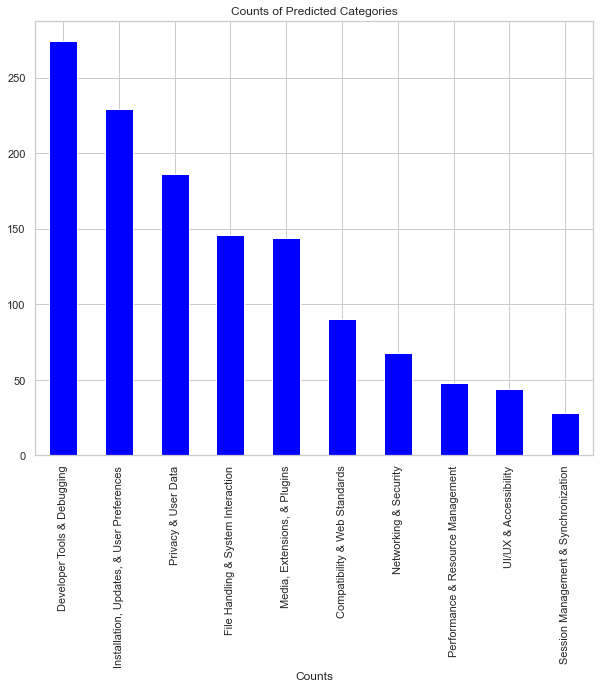

In [98]:
import matplotlib.pyplot as plt

# Data for plotting
categories = df['Predicted_Category'].value_counts()


# Creating the bar chart
plt.figure(figsize=(10, 8))
categories.plot(kind='bar',color='blue')
plt.xlabel('Counts')
plt.title('Counts of Predicted Categories')
plt.show()
